## Gaussian Mixture model for cleaner reconstruction results

This notebook is for the development of an additional cleaning step after (or before the reconstruction) to get more precise mapping results. The aim is to write a function that will be include in the tissue reconstruction. The additional step should be optional and given as input into the reconstruct function.

In [2]:
# imports
import anndata
%matplotlib inline
import novosparc

import os
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
# import altair as alt
from scipy.spatial.distance import cdist, squareform, pdist
from scipy.stats import ks_2samp
from scipy.stats import pearsonr

import random
random.seed(0)

### Test on Drosophila example

In [ ]:
sdge = np.genfromtxt("droso_sdge.csv", delimiter=",")
dataset_reconst = sc.read_h5ad("droso_reconstruction.h5ad")
atlas_dir = '../../novosparc/datasets/bdtnp/'
target_space_path = os.path.join(atlas_dir, 'geometry.txt')
locations = pd.read_csv(target_space_path, sep=' ')
num_locations = 3039
locations_apriori = locations[:num_locations][['xcoord', 'zcoord']].values
locations = locations_apriori

atlas_path = os.path.join(atlas_dir, 'dge.txt')
atlas = sc.read(atlas_path)
atlas_genes = atlas.var.index.tolist()
atlas.obsm['spatial'] = locations

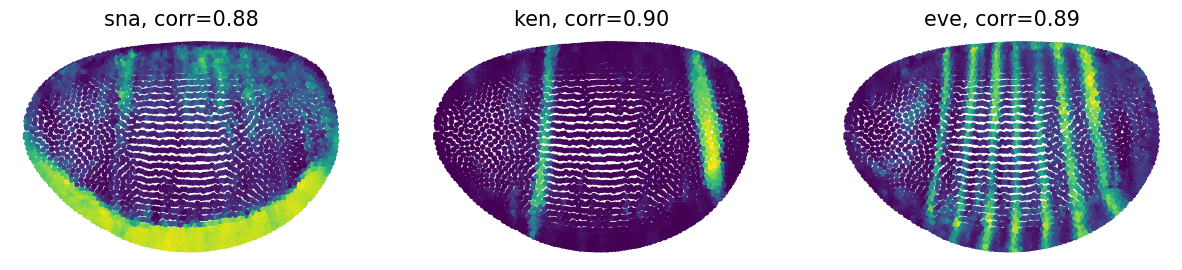

<Figure size 432x288 with 0 Axes>

In [12]:
# test original reconstructed expression of individual genes
pl_genes = ['sna', 'ken', 'eve']
dataset_reconst.obsm['spatial'] = locations

title = ['%s, corr=%.02f' % (g, pearsonr(dataset_reconst[:,g].X.flatten(), atlas[:,g].X.flatten())[0] ) for g in pl_genes]
novosparc.pl.embedding(dataset_reconst, pl_genes, title=title)

## Apply Gaussian mixture Model